# Buzz in social media

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [71]:
colnames = ['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6', 
            'AI_0', 'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6', 
            'AS(NA)_0', 'AS(NA)_1', 'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4', 'AS(NA)_5', 'AS(NA)_6', 
            'BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6',
            'NAC_0', 'NAC_1', 'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6', 
            'AS(NAC)_0', 'AS(NAC)_1', 'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4', 'AS(NAC)_5', 'AS(NAC)_6', 
            'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6', 
            'AT_0', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6', 
            'NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4', 'NA_5', 'NA_6', 
            'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5', 'ADL_6',
            'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4', 'NAD_5', 'NAD_6', 'MNAD']
twitter_dt = pd.read_csv('Twitter.data', names=colnames)


In [72]:
twitter_dt

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,AI_3,AI_4,AI_5,AI_6,AS(NA)_0,AS(NA)_1,AS(NA)_2,AS(NA)_3,AS(NA)_4,AS(NA)_5,AS(NA)_6,BL_0,BL_1,BL_2,BL_3,BL_4,BL_5,BL_6,NAC_0,NAC_1,NAC_2,NAC_3,NAC_4,NAC_5,NAC_6,AS(NAC)_0,AS(NAC)_1,AS(NAC)_2,AS(NAC)_3,AS(NAC)_4,AS(NAC)_5,AS(NAC)_6,CS_0,CS_1,CS_2,CS_3,CS_4,CS_5,CS_6,AT_0,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,NA_0,NA_1,NA_2,NA_3,NA_4,NA_5,NA_6,ADL_0,ADL_1,ADL_2,ADL_3,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,MNAD
0,0,2,0,0,1,1,1,0,1,0,0,1,1,1,0.000000,0.000003,0.000000,0.000000,0.000004,0.000004,0.000004,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,2,0,0,1,1,1,0.000000,0.000003,0.000000,0.000000,0.000002,0.000002,0.000002,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,1,0,0,1,1,1,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,0,0,0,4,0.000007,0.000003,0.000000,0.000000,0.000000,0.000000,0.000012,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2,1,0,0,0,0,4,0.000003,0.000002,0.000000,0.000000,0.000000,0.000000,0.000006,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2,1,0,0,0,0,4,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,0,0,4,1,0.000003,0.000000,0.000000,0.000000,0.000000,0.000012,0.000003,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1,0,0,0,0,4,1,0.000002,0.000000,0.000000,0.000000,0.000000,0.000006,0.000002,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1,0,0,0,0,4,1,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0.000003,0.000000,0.000000,0.000003,0.000000,0.000000,0.000001,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,1,0,0,1,0.000002,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,1,0,0,1,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,0,1,2,3,0.000000,0.000003,0.000000,0.000000,0.000001,0.000002,0.000003,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,1,0,0,1,2,3,0.000000,0.000001,0.000000,0.000000,0.000000,0.000001,0.000002,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,1,0,0,1,2,3,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,1,0,0,1,2,3,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583245,1289,1228,1343,1999,1789,1643,1626,582,487,506,752,663,586,582,0.002397,0.002285,0.002448,0.003344,0.003014,0.002691,0.002625,0.991538,0.990323,0.993343,0.996510,0.995548,0.995154,0.996934,1595,1396,1498,2290,2043,1852,1918,0.001269,0.001244,0.001329,0.001829,0.001576,0.001412,0.001466,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.224615,1.196774,1.116124,1.111665,1.105175,1.104179,1.101778,1375,1203,1257,1879,1740,1570,1535,1.276923,1.219355,1.148669,1.147557,1.155259,1.143549,1.185776,1300,1240,1352,2006,1797,1651,1631,2120.0
583246,1228,1343,1999,1789,1643,1626,2582,487,506,752,663,586,582,947,0.002285,0.002448,0.003344,0.003014,0.002691,0.002625,0.003863,0.990323,0.993343,0.996510,0.995548,0.995154,0.996934,0.999226,1396,1498,2290,2043,1852,1918,3123,0.001244,0.001329,0.001829,0.001576,0.001412,0.001466,0.002442,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.196774,1.116124,1.111665,1.105175,1.104179,1.101778,1.094040,1203,1257,1879,1740,1570,1535,2201,1.219355,1.148669,1.147557,1.155259,1.143549,1.185776,1.217879,1240,1352,2006,1797,1651,1631,2584,1490.0
583247,1343,1999,1789,1643,1626,2582,1649,506,752,663,586

В датасете нет пропущенных значений, поэтому не надо его очищать

In [73]:
twitter_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   NCD_0      583250 non-null  int64  
 1   NCD_1      583250 non-null  int64  
 2   NCD_2      583250 non-null  int64  
 3   NCD_3      583250 non-null  int64  
 4   NCD_4      583250 non-null  int64  
 5   NCD_5      583250 non-null  int64  
 6   NCD_6      583250 non-null  int64  
 7   AI_0       583250 non-null  int64  
 8   AI_1       583250 non-null  int64  
 9   AI_2       583250 non-null  int64  
 10  AI_3       583250 non-null  int64  
 11  AI_4       583250 non-null  int64  
 12  AI_5       583250 non-null  int64  
 13  AI_6       583250 non-null  int64  
 14  AS(NA)_0   583250 non-null  float64
 15  AS(NA)_1   583250 non-null  float64
 16  AS(NA)_2   583250 non-null  float64
 17  AS(NA)_3   583250 non-null  float64
 18  AS(NA)_4   583250 non-null  float64
 19  AS(NA)_5   583250 non-n

In [74]:
y = twitter_dt['MNAD']
X = twitter_dt.drop(columns=['MNAD'])

In [75]:
corr_matrix = X.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,AI_3,AI_4,AI_5,AI_6,AS(NA)_0,AS(NA)_1,AS(NA)_2,AS(NA)_3,AS(NA)_4,AS(NA)_5,AS(NA)_6,BL_0,BL_1,BL_2,BL_3,BL_4,BL_5,BL_6,NAC_0,NAC_1,NAC_2,NAC_3,NAC_4,NAC_5,NAC_6,AS(NAC)_0,AS(NAC)_1,AS(NAC)_2,AS(NAC)_3,AS(NAC)_4,AS(NAC)_5,AS(NAC)_6,CS_0,CS_1,CS_2,CS_3,CS_4,CS_5,CS_6,AT_0,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,NA_0,NA_1,NA_2,NA_3,NA_4,NA_5,NA_6,ADL_0,ADL_1,ADL_2,ADL_3,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
NCD_0,1.00,0.92,0.88,0.88,0.89,0.91,0.90,0.90,0.81,0.76,0.75,0.75,0.76,0.74,0.88,0.82,0.80,0.81,0.82,0.83,0.82,0.09,0.08,0.09,0.09,0.08,0.07,0.07,1.00,0.92,0.88,0.88,0.89,0.91,0.90,0.88,0.83,0.82,0.83,0.84,0.85,0.85,0.09,0.08,0.09,0.09,0.08,0.06,0.06,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.97,0.89,0.85,0.85,0.85,0.87,0.86,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,1.00,0.92,0.88,0.88,0.89,0.91,0.90
NCD_1,0.92,1.00,0.92,0.90,0.90,0.91,0.90,0.83,0.90,0.80,0.77,0.76,0.77,0.75,0.82,0.88,0.81,0.81,0.81,0.82,0.81,0.09,0.09,0.09,0.08,0.08,0.06,0.07,0.92,1.00,0.91,0.90,0.90,0.91,0.90,0.83,0.88,0.83,0.83,0.84,0.85,0.84,0.08,0.09,0.09,0.08,0.08,0.06,0.06,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.89,0.97,0.88,0.86,0.86,0.87,0.86,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,0.92,1.00,0.92,0.90,0.90,0.91,0.90
NCD_2,0.88,0.92,1.00,0.93,0.91,0.90,0.88,0.80,0.82,0.90,0.81,0.78,0.76,0.74,0.81,0.81,0.88,0.83,0.82,0.81,0.79,0.09,0.08,0.10,0.09,0.08,0.06,0.07,0.88,0.91,1.00,0.93,0.91,0.90,0.88,0.81,0.81,0.89,0.85,0.84,0.83,0.82,0.08,0.08,0.10,0.08,0.08,0.06,0.06,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.85,0.89,0.97,0.90,0.87,0.86,0.84,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,0.88,0.92,1.00,0.93,0.91,0.90,0.88
NCD_3,0.88,0.90,0.93,1.00,0.94,0.91,0.88,0.80,0.81,0.84,0.90,0.82,0.77,0.74,0.81,0.81,0.83,0.89,0.84,0.81,0.79,0.09,0.08,0.09,0.09,0.08,0.06,0.06,0.87,0.89,0.93,1.00,0.94,0.91,0.88,0.81,0.81,0.83,0.91,0.86,0.83,0.81,0.08,0.08,0.09,0.09,0.08,0.06,0.06,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.85,0.87,0.90,0.97,0.90,0.87,0.84,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,0.88,0.90,0.93,1.00,0.94,0.91,0.88
NCD_4,0.89,0.90,0.91,0.94,1.00,0.94,0.90,0.81,0.82,0.82,0.84,0.89,0.82,0.76,0.83,0.82,0.82,0.85,0.90,0.84,0.80,0.09,0.08,0.09,0.09,0.09,0.06,0.07,0.88,0.90,0.90,0.94,1.00,0.94,0.90,0.83,0.82,0.83,0.86,0.91,0.86,0.83,0.08,0.08,0.09,0.08,0.08,0.06,0.06,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.86,0.87,0.88,0.91,0.97,0.90,0.86,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,0.89,0.90,0.91,0.94,1.00,0.94,0.90
NCD_5,0.91,0.91,0.90,0.91,0.94,1.00,0.94,0.82,0.82,0.80,0.80,0.82,0.89,0.81,0.85,0.85,0.83,0.83,0.85,0.90,0.84,0.09,0.08,0.10,0.09,0.08,0.07,0.07,0.90,0.91,0.89,0.90,0.94,1.00,0.94,0.85,0.85,0.84,0.84,0.87,0.92,0.87,0.09,0.08,0.09,0.09,0.08,0.07,0.06,0.01,0.01,0.02,0.01,0.01,-0.00,0.00,0.88,0.88,0.87,0.87,0.90,0.96,0.90,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,0.91,0.91,0.90,0.91,0.94,1.00,0.94
NCD_6,0.90,0.90,0.88,0.88,0.90,0.94,1.00,0.81,0.81,0.78,0.77,0.77,0.82,0.88,0.85,0.85,0.83,0.82,0.82,0.84,0.90,0.09,0.08,0.10,0.09,0.08,0.07,0.07,0.89,0.90,0.88,0.88,0.90,0.94,1.00,0.86,0.85,0.84,0.83,0.84,0.87,0.92,0.09,0.08,0.09,0.09,0.08,0.06,0.07,0.01,0.01,0.02,0.01,0.01,-0.00,-0.00,0.87,0.87,0.85,0.84,0.86,0.90,0.96,0.01,0.01,0.01,0.01,0.00,-0.01,-0.01,0.90,0.90,0.88,0.88,0.90,0.94,1.00
AI_0,0.90,0.83,0.80,0.80,0.81,0.82,0.81,1.00,0.89,0.84,0.83,0.83,0.84,0.83,0.84,0.78,0.77,0.78,0.80,0.81,0.81,0.10,0.09,0.10,0.10,0.09,0.07,0.07,0.90,0.83,0.80,0.80,0.81,0.83,0.82,0.77,0.71,0.71,0.74,0.75,0.77,0.76,0.10,0.08,0.10,0.09,0.09,0.07,0.07,0.02,0.02,0.03,0.02,0.01,0.01,0.00,0.95,0.87,0.84,0.84,0.85,0.86,0.85,0.02,0.01,0.02,0.01,0.01,-0.00,-0.00,0.90,0.83,0.80,0.80,0.81,0.82,0.81
AI_1,0.81,0.90,0.82,0.81,0.82,0.82,0.81,0.89,1.00,0.89,0.85,0.85,0.85,0.83,0.77,0.84,0.77,0.78,0.79,0.79,0.79,0.09,0.10,0.10,0.09,0.09,0.07,0.07,0.81,0.90,0.82,0.81,0.82,0.82,0.81,0.70,0.76,0.71,0.73,0.74,0.75,0.74,0.09,0.10,0.10,0.09,0.08,0.07,0.07,0.02,0.02,0.03,0.02,0.01,0.00,0.00,0.85,0.95,0.86,0.85,0.85,0.86,0.84,0.01,0.02,0.02,0.01,0.01,-0.00,-0.00,0.81,0.90,0.82,0.81,

(0.0, 50.0)

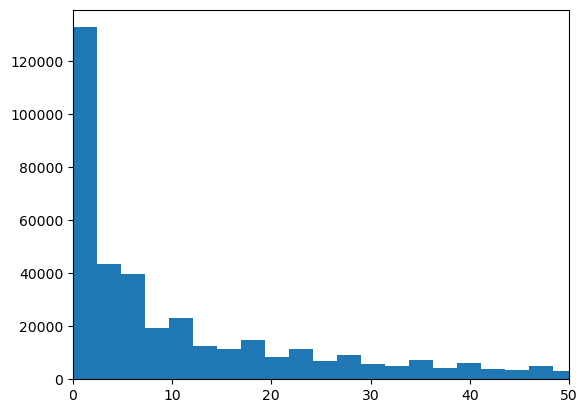

In [96]:
plt.hist(X['NCD_0'], bins=10000)
plt.xlim([0, 50])
# plt.xlim([0, 60000])

<Axes: >

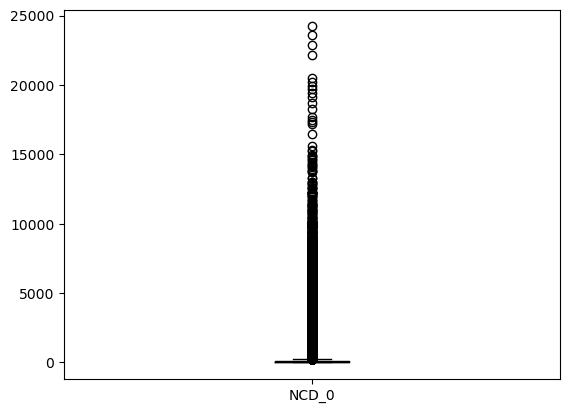

In [98]:
X.boxplot(column=['NCD_0'], grid= False , color='black')